# Data Preparation

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False


In [7]:
dir="../dataset/"
file1="un-general-debates.csv"
df1=pd.read_csv(dir+file1)
file2="Speakers_by_session.xlsx"
df2=pd.read_excel(dir+file2)
df1.rename(columns={'ISO Code':'country'})
df2.rename(columns={'Year':'year', 'Session':'session', 'ISO Code':'country','Country':'country_name',
                    'Name of Person Speaking':'speaker','Post':'position'}, inplace=True)
df2.drop('Unnamed: 6',axis=1, inplace=True)

df=df1.merge(df2,how='left',on=['year','session','country'])

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7507 entries, 0 to 7506
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   session  7507 non-null   int64 
 1   year     7507 non-null   int64 
 2   country  7507 non-null   object
 3   text     7507 non-null   object
dtypes: int64(2), object(2)
memory usage: 234.7+ KB


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10559 entries, 0 to 10558
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          10559 non-null  int64 
 1   session       10559 non-null  int64 
 2   country       10558 non-null  object
 3   country_name  10559 non-null  object
 4   speaker       10551 non-null  object
 5   position      5903 non-null   object
dtypes: int64(2), object(4)
memory usage: 495.1+ KB


In [10]:
df.to_csv(dir+"un-general-debates-blueprint.csv")

# 1.4 Data EDA

In [11]:
file="un-general-debates-blueprint.csv"
df=pd.read_csv("../dataset/"+file, index_col=0)
display(df.sample(2))
display(df.sample(frac=0.1))

,session,year,country,text,country_name,speaker,position
4281,53,1998,CAN,"Allow me to congratulate\nyou, Sir, on your el...",Canada,Lloyd Axworthy,Minister for Foreign Affairs
3279,38,1983,BTN,"﻿73.\t Mr. President, I should like to begin b...",Bhutan,PRADHAN,NaN


,session,year,country,text,country_name,speaker,position
152,44,1989,COM,"﻿\nSir, I should like first to convey to you, ...",Comoros,KAFE,NaN
3562,54,1999,HUN,Allow\nme first to congratulate the President ...,Hungary,Janos Martonyi,Minister for Foreign Affairs
7206,62,2007,GNB,"First of all, I would \nlike to congratulate t...",Guinea-Bissau,João Bernardo Vieira,President
363,68,2013,GMB,We praise the almighty Allah \nfor making poss...,Gambia,Al Hadji Yahya Jammeh,President
3767,60,2005,PHL,I convey my\ndelegation’s felicitations on you...,Philippines,"Alberto Gatmaitan Romulo,",Minister for Foregn Affairs
...,...,...,...,...,...,...,...
3309,38,1983,AFG,"﻿66.\t May I, at the outset, Sir, express to y...",Afghanistan,Dost,NaN
7150,62,2007,GRC,"The great challenges and problems, both globa...",Greece,Yannis Valinakis,Minister for Foreign Affairs
1381,51,1996,NGA,"﻿On behalf of the Nigerian\ndelegation, I conv...",Nigeria,Chief Tom Ikimi,Minister for Foreign Affairs
5598,48,1993,PHL,\nI am most pleased to\nconvey to Ambassador I...,Philippines,Mr. ROMULO,NaN


In [12]:
## 텍스트 문자열의 길이를 담은 컬럼 length 추가
df['length']=df['text'].str.len()

## 수치형 자료 컬럼에 대한 요약 통계
display(df.describe().T)

## 범주형 자료 컬럼에 대한 요약 통계
display(df[['country','speaker']].describe(include='O').T) # 'O': np.object의 별칠

,count,mean,std,min,25%,50%,75%,max
session,7507.0,49.610763,12.892155,25.0,39.0,51.0,61.0,70.0
year,7507.0,1994.610763,12.892155,1970.0,1984.0,1996.0,2006.0,2015.0
length,7507.0,17967.281604,7860.038463,2362.0,12077.0,16424.0,22479.5,72041.0


,count,unique,top,freq
country,7507,199,IRN,46
speaker,7473,5425,Seyoum Mesfin,12


In [13]:
## 결측치 확인
display(df.isna().sum())

session            0
year               0
country            0
text               0
country_name      32
speaker           34
position        3014
length             0
dtype: int64

In [14]:
## 결측치 대체
df['speaker'].fillna('unknown', inplace=True)

## 동일한 사람이더라도 다양하게 명명될 수 있다는 점에 유의
print(df[df['speaker'].str.contains('Bush')]['speaker'].value_counts())

speaker
George W. Bush        4
Mr. George W. Bush    2
Bush                  1
George Bush           1
Mr. George W Bush     1
Name: count, dtype: int64


<Axes: >

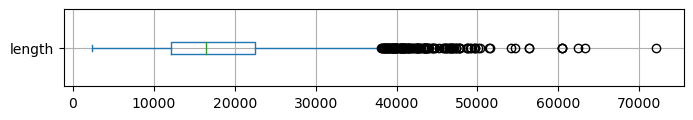

In [15]:
## 값분포 시각화
df['length'].plot(kind='box', vert=False, figsize=(8, 1), grid=True) # pandas 내장 plot 기능, vert false: 수직 x -> 수평으로 보여주기

<Axes: ylabel='Frequency'>

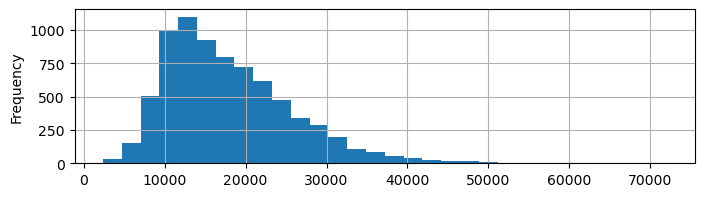

In [16]:
df['length'].plot(kind='hist', bins=30, figsize=(8, 2), grid=True)

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


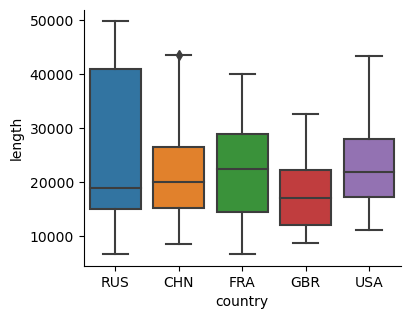

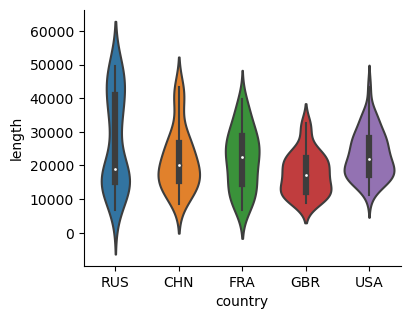

In [17]:
## 범주 간의 값 분포 비교
# 안보리 상임이사국 5개국의 연설문 길이 length column 의 분포 비교
import seaborn as sns
# 안보리 상임이사국 조건문
where=df['country'].isin(['USA','FRA','GBR','CHN','RUS'])
# 박스플롯
g=sns.catplot(data=df[where], x='country', y='length', kind='box')
g.fig.set_size_inches(4, 3) ### x,y 의 비율 결정
g.fig.set_dpi(100) ### 도화지의 크기 결정
# 바이올린 플롯
v=sns.catplot(data=df[where], x='country', y='length', kind='violin')
v.fig.set_size_inches(4,3)
v.fig.set_dpi(100) 


<Axes: title={'center': 'Number of Countries'}, xlabel='year'>

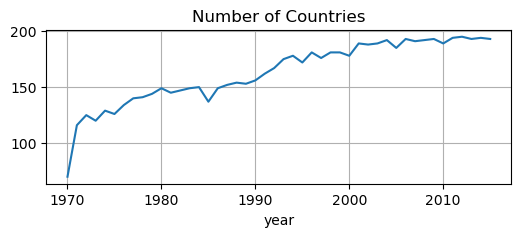

In [18]:
## 시간 경과에 따른 변화 시각화
# 연도별, 국가 수의 그래프
df.groupby('year').size().plot(title='Number of Countries', figsize=(6,2), grid=True)

<Axes: title={'center': 'Avg. Speech Length'}, xlabel='year'>

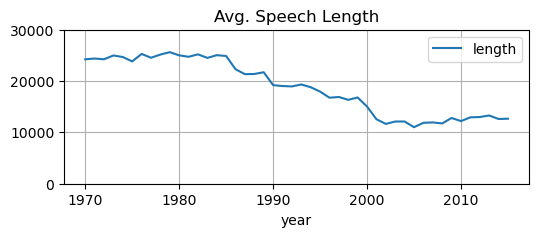

In [19]:
# 연도별, 연설문의 평균 길이
df.groupby('year').agg({'length':'mean'}).plot(title="Avg. Speech Length", ylim=(0,30000)
                                              , figsize=(6,2), grid=True)
# .agg({컬럼명:적용할 함수명})

# 1.5 Pipeline

In [20]:
## 정규표현식을 이용한 토큰화
# p{L}: 하나 이상의 문자(외국문자 움라우트 같은 거도 포섭가능하도록하는)
import regex as re
def tokenize(text):
    return re.findall(r'[\w-]*\p{L}[\w-]*', text)

# 예제
text="Let's defeat SARS-CoV-2 together in 2020!"
tokens=tokenize(text)
print(tokens)

['Let', 's', 'defeat', 'SARS-CoV-2', 'together', 'in']


In [21]:
## 불용어 처리
# set을 사용하여 조회시간 줄여주자(해쉬구조)
import nltk # natural language toolkit

stopwords=set(nltk.corpus.stopwords.words('english')) # 말뭉치.불용어.워드=영어
print("stopwords:\n", stopwords)

# stopwords에 없는 토큰들만 리스트로 반환하는 함수
def remove_stopwords(tokens):
    stopwords=set(nltk.corpus.stopwords.words('english'))
    return [t for t in tokens if t.lower() not in stopwords]

# stopwords에 추가하거나, stopwords에서 제거하려는 토큰들(stopwords가 해쉬 집합으로 되어있어서 {})
include_stopwords={'dear','regards','must','would','also'}
exclude_stopwords={'against'}
# stopwords 재정의
stopwords|=include_stopwords # set()|set() 합집합
stopwords-=exclude_stopwords # set()-set() 교집합
print("stopwords:\n", sorted(stopwords))

stopwords:
 {'that', 'mustn', "doesn't", 'and', 'will', 'yours', 'there', 'theirs', 'herself', 'isn', 'him', "that'll", "won't", "shouldn't", 'or', 'with', 'haven', 'below', 'when', 'which', 'too', 'for', 'those', 'up', 'hasn', 'by', "wouldn't", 'out', 'needn', "hadn't", 'weren', 'between', 'ain', 'having', 'hadn', 'before', "should've", 'our', 'be', 'himself', 'down', "didn't", 'no', 'over', 'been', 'should', 'the', 'until', "needn't", 'further', 'into', "you've", 'do', 'each', 'to', 'so', 'ours', "she's", 'their', 'doing', 'above', 'has', 'have', 'again', 'mightn', "you're", 'what', 'where', "isn't", 'hers', 'own', 'your', 'don', 'd', 'll', 'wasn', 'very', 'nor', 'he', 'few', 'i', 'is', 'such', "mustn't", 'she', 'same', 'any', 'during', 'but', "haven't", 'aren', 'they', "don't", 'yourself', 'shan', 'his', 'can', 'my', 'yourselves', 'all', 'these', 'm', 'here', "mightn't", 'you', 'being', "wasn't", 'other', 'themselves', 'myself', "shan't", 's', 'on', 'in', 'through', 'more', 'once', 

In [22]:
## 파이프라인
pipeline = [str.lower,tokenize, remove_stopwords] # 대소문자 변환, 토큰화, 불용어 제거

def prepare(text,pipeline):
    tokens=text
    for transform in pipeline:
        tokens=transform(tokens)
    return tokens

df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)
df['num_tokens'] = df['tokens'].map(len)
display(df.sample(frac=0.05))

,session,year,country,text,country_name,speaker,position,length,tokens,num_tokens
3978,42,1987,FJI,"﻿My delegation warmly congratulates you, Sir, ...",Fiji,THOMPSON,NaN,8713,"[delegation, warmly, congratulates, sir, elect...",725
443,40,1985,DJI,"Tunisia, a friendly sister State, has just fal...",Djibouti,Mr. Farah,NaN,22019,"[tunisia, friendly, sister, state, fallen, vic...",1819
2310,65,2010,CYP,I congratulate \nMr. Joseph Deiss on his assum...,Cyprus,Dimitris Christofias,President,11955,"[congratulate, mr, joseph, deiss, assumption, ...",968
4205,53,1998,AND,I would first\nlike to congratulate the Presid...,Andorra,Albert Pintat-Santolària,Minister for Foreign Affairs,15936,"[would, first, like, congratulate, president, ...",1305
294,68,2013,LBY,"At the outset, \nI warmly congratulate Mr. Joh...",Libya,Ali Zeidan,Prime Minister,12569,"[outset, warmly, congratulate, mr, john, ashe,...",1018
...,...,...,...,...,...,...,...,...,...,...
587,63,2008,ATG,I wish at \nthe outset to extend heartiest con...,Antigua and Barbuda,Winston Baldwin Spencer,Prime Minister,10511,"[wish, outset, extend, heartiest, congratulati...",852
3794,60,2005,NOR,"I, too, congratulate you,\nSir, on your electi...",Norway,Jan Petersen,Minister for Foregn Affairs,11593,"[congratulate, sir, election, president, gener...",1006
6745,49,1994,TUR,Allow me to congratulate the\nPresident on his...,Turkey,Mr. Mümtaz Soysal,Minister for Foreign Affairs,25959,"[allow, congratulate, president, election, hig...",2166
1459,51,1996,EGY,﻿This session is being held amid a very sensit...,Egypt,Amre Moussa,Minister for Foreign Affairs,29838,"[session, held, amid, sensitive, delicate, int...",2488


# 1.6 Word Frequncy Analysis

In [25]:
## counter클래스를 이용한 단어 계수
from collections import Counter

tokens=tokenize("She likes my cats and my cats like my sofa.")
print(tokens)

counter=Counter(tokens)
print("original counter: ",counter)

more_tokens= tokenize("She likes dogs and cats.")
counter.update(more_tokens) ## Counter.update: 생성된 카운터 객체를 추가적인 토큰을 가지고 update하는 것
print("updated counter: ",counter)

['She', 'likes', 'my', 'cats', 'and', 'my', 'cats', 'like', 'my', 'sofa']
original counter:  Counter({'my': 3, 'cats': 2, 'She': 1, 'likes': 1, 'and': 1, 'like': 1, 'sofa': 1})
updated counter:  Counter({'my': 3, 'cats': 3, 'She': 2, 'likes': 2, 'and': 2, 'like': 1, 'sofa': 1, 'dogs': 1})


In [32]:
## counter 를 df token에 적용 -> 각 레코드의 토큰이 {토큰: 빈도}로 변환
counter=Counter()
df['tokens'].map(counter.update)
## df[tokens]의 토큰들을 가지고 counter 객체를 업데이트 한것이라 반환 값이 없음. 대신 counter 객체가 모든 토큰을 가지고 업데이트 된 상태가 됨.
print(counter)

Counter({'nations': 124508, 'united': 120763, 'international': 117223, 'world': 89421, 'countries': 85734, 'peace': 72625, 'development': 62632, 'states': 59713, 'people': 59338, 'security': 58425, 'economic': 53833, 'must': 51880, 'also': 47403, 'new': 44453, 'country': 40878, 'assembly': 40413, 'community': 38294, 'government': 37430, 'general': 37138, 'organization': 36434, 'human': 36384, 'would': 35936, 'efforts': 35184, 'us': 34618, 'rights': 33495, 'political': 33353, 'one': 31840, 'africa': 31293, 'support': 30224, 'council': 29573, 'session': 29391, 'developing': 25977, 'peoples': 25161, 'time': 24870, 'order': 23581, 'republic': 23369, 'national': 23221, 'problems': 23176, 'many': 22849, 'year': 22702, 'situation': 22621, 'state': 22579, 'years': 22400, 'south': 22246, 'global': 21881, 'conference': 21719, 'region': 21470, 'social': 21133, 'like': 20566, 'work': 20495, 'made': 20328, 'war': 20070, 'great': 19505, 'process': 19493, 'hope': 19399, 'nuclear': 19271, 'continue': 

In [34]:
## 빈도수 최상위 
print(counter.most_common(20))

[('nations', 124508), ('united', 120763), ('international', 117223), ('world', 89421), ('countries', 85734), ('peace', 72625), ('development', 62632), ('states', 59713), ('people', 59338), ('security', 58425), ('economic', 53833), ('must', 51880), ('also', 47403), ('new', 44453), ('country', 40878), ('assembly', 40413), ('community', 38294), ('government', 37430), ('general', 37138), ('organization', 36434)]


In [40]:
## counter class를 pandas dataframe으로 변환하기
# 컬럼: token, freq
def count_words(df, column='tokens', preprocess=None, min_freq=2):
    # 토큰들을 처리하고 counter를 업데이트
    def update(doc):
        tokens= doc if preprocess is None else preprocess(doc)
        counter.update(tokens)

    # counter를 생성하고, 모든 데이터에 대해 update를 실행
    counter= Counter()
    df[column].map(update)

    # counter를 데이터 프레임으로 변환
    freq_df=pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df=freq_df.query('freq>=@min_freq')
    freq_df.index.name='token'

    return freq_df.sort_values('freq', ascending=False)

## orient와 query
# orient는 pandas.DataFrame.from_dict 함수에서 사용되는 매개변수로서,
# 딕셔너리의 key를 데이터프레임의 인덱스로 사용하라는 의미
# 다른 가능한 값으로는 'columns','dict','list','series','split','records'

# query는 pandas.DataFrame.query 함수에서 사용되며, 
# DataFrame의 컬럼을 boolean 표현식으로 쿼리하는 데 사용
# @ 기호는 외부 변수를 참조하라는 의미

In [43]:
freq_df=count_words(df)
display(freq_df.head(10))

,freq
token,
nations,124508
united,120763
international,117223
world,89421
countries,85734
peace,72625
development,62632
states,59713
people,59338


In [44]:
## 사용자 지정 전처리 함수 사용하기
count_words(df, column='text', preprocess=lambda text: re.findall(r'\w{10,}',text))

,freq
token,
international,106974
development,51334
Government,35528
Organization,33763
developing,25177
...,...
biodegradable,2
Vocational,2
Gamsakhurdia,2


[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

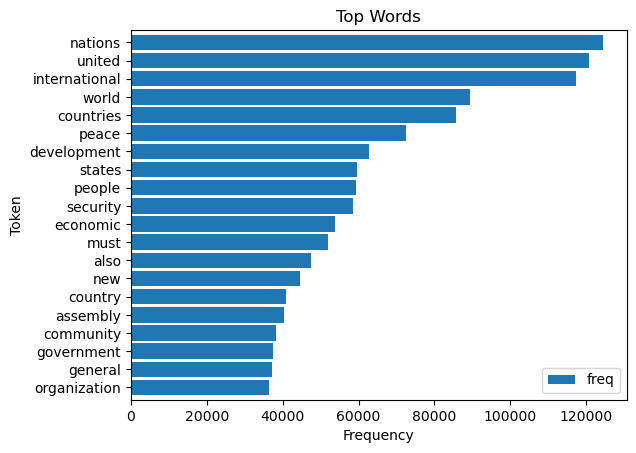

In [50]:
## 빈도 다이어그램 생성
ax= freq_df.head(20).plot(kind='barh', width=0.85)
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')

!pip install wordcloud

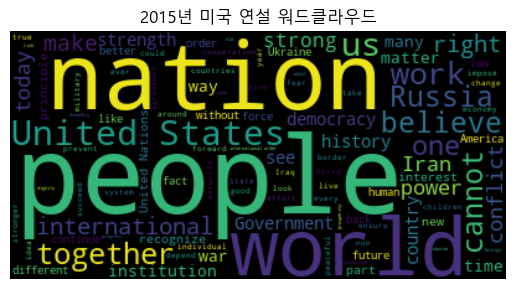

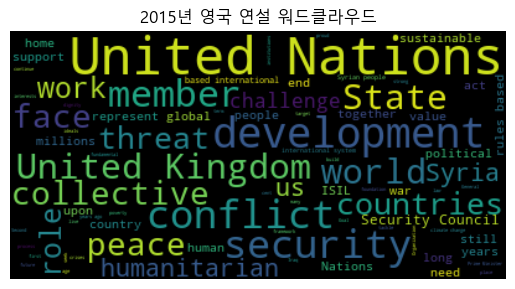

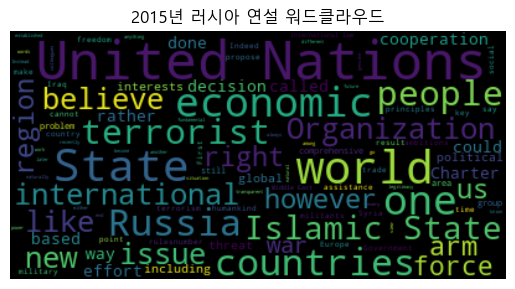

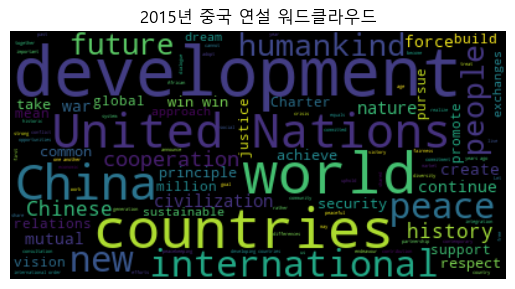

In [69]:
## 워드 클라우드 생성
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# text= df.query("year==2015 and country=='USA'")['text'] # 2015년 미국의 연설 가져오기
text= df.query("year==2015 and country=='USA'")['text'].values[0] # values는 넘파이 어레이로 가져와서 인덱싱하여 값만 문자열로 도출
wc=WordCloud(max_words=100, stopwords=stopwords) # WordCloud 객체 생성, max_words: 최대언급횟수
wc.generate(text) # WordCloud 객체에 text를 넣어 분석하게 하기, wordlcoud객체는 텍스트(문자열)를 받음
plt.imshow(wc, interpolation='bilinear')
plt.title("2015년 미국 연설 워드클라우드")
plt.axis('off')
plt.show()

text= df.query("year==2015 and country=='GBR'")['text'].values[0] 
wc=WordCloud(max_words=100, stopwords=stopwords) 
wc.generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.title("2015년 영국 연설 워드클라우드")
plt.axis('off')
plt.show()

text= df.query("year==2015 and country=='RUS'")['text'].values[0] 
wc=WordCloud(max_words=100, stopwords=stopwords) 
wc.generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.title("2015년 러시아 연설 워드클라우드")
plt.axis('off')
plt.show()

text= df.query("year==2015 and country=='CHN'")['text'].values[0] 
wc=WordCloud(max_words=100, stopwords=stopwords) 
wc.generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.title("2015년 중국 연설 워드클라우드")
plt.axis('off')
plt.show()

In [93]:
# count_words에 의해 생성된 빈도값을 포함하는 pandas series를 지원하도록 하는 함수
def wordcloud(word_freq, title=None, max_words=200, stopwords=None): # word_freq: pd.Series 객체(index:token, value:freq)
    wc=WordCloud(width=1600, height=800, background_color="black",
                colormap="Paired", max_font_size=150, max_words=max_words)

    # 시리즈를 사전형으로 변경한다.
    if type(word_freq)==pd.Series:
        counter=Counter(word_freq.fillna(0).to_dict())
    else:
        counter=word_freq

    # 빈도 counter에서 불용어를 필터링
    if stopwords is not None:
        counter={token:freq for (token,freq) in counter.items() if token not in stopwords}

    wc.generate_from_frequencies(counter)

    plt.title(title)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    # plt.show()

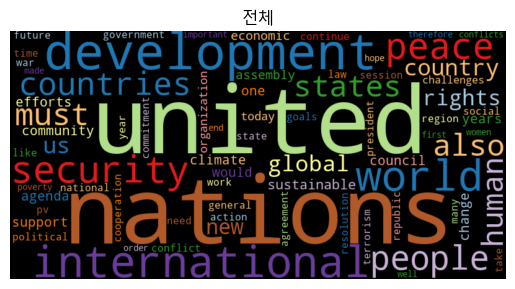

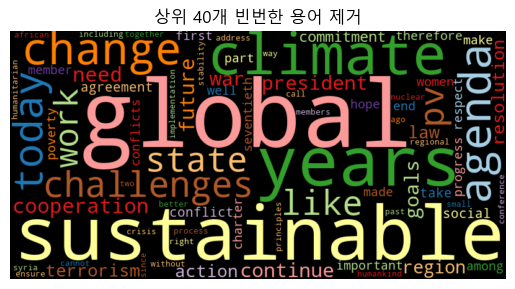

In [85]:
## 2015년의 모든 연설을 워드 클라우드로 표현
freq_2015_df=count_words(df[df['year']==2015])
plt.figure()
wordcloud(freq_2015_df['freq'],max_words=75, title='전체')
wordcloud(freq_2015_df['freq'],max_words=75, stopwords=freq_df.head(40).index, title='상위 40개 빈번한 용어 제거')

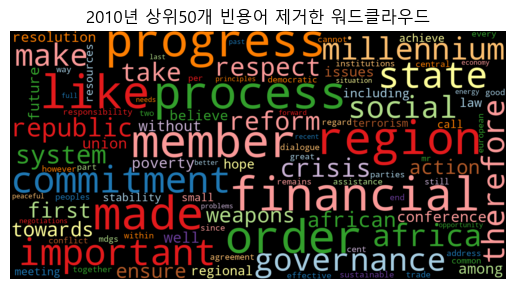

In [94]:
## 1991년부터 2010년 까지의 모든 연설 워드클라우드화해보기
for i in range(1991,2011,1):
    freq_df=count_words(df[df['year']==i])
    wordcloud(freq_df['freq'],max_words=100, stopwords=freq_df.head(50).index, title=f'{i}년 상위50개 빈용어 제거한 워드클라우드')
    plt.savefig(f'../output/{i}년_UN총회연설_워드클라우드.png')

In [98]:
## TF-IDF
def compute_idf(df, column='tokens', preprocess=None, min_df=2):
    def update(doc):
        tokens= doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))

    # 토큰 개수
    counter=Counter()
    df[column].map(update)

    # 데이터프레임 생성 후, idf 계산
    idf_df=pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df=idf_df.query('df>=@min_df')
    idf_df['idf']= np.log(len(df)/idf_df['df'])+0.1 ###
    idf_df.index.name='token'
    return idf_df

idf_df=compute_idf(df)
idf_df

C:\Users\user\AppData\Local\Temp\ipykernel_2076\194873191.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idf_df['idf']= np.log(len(df)/idf_df['df'])+0.1 ###


,df,idf
token,,
inter-communal,82,4.616872
year,6353,0.266909
successes,746,2.408866
fury,60,4.929247
mere,1095,2.025082
...,...,...
dzurinda,2,8.330444
soekarnoputri,2,8.330444
megawati,2,8.330444


In [105]:
freq_df

,freq,tfidf
token,,
nations,2338,237.540302
united,2272,231.137872
international,2013,212.324271
development,1439,201.389439
world,1386,147.304779
...,...,...
insurgents,2,11.115711
shipping,2,8.052758
suspected,2,10.106599


In [106]:
freq_df['tfidf']=freq_df['freq']*idf_df['idf']
freq_df.sort_values(by='tfidf',ascending=False)

,freq,tfidf
token,,
sixty-fifth,160,611.133522
mdgs,221,591.828019
governance,337,569.061340
climate,618,558.055536
global,1115,451.088526
...,...,...
africa-eu,2,NaN
icnnd,2,NaN
mapuche,2,NaN


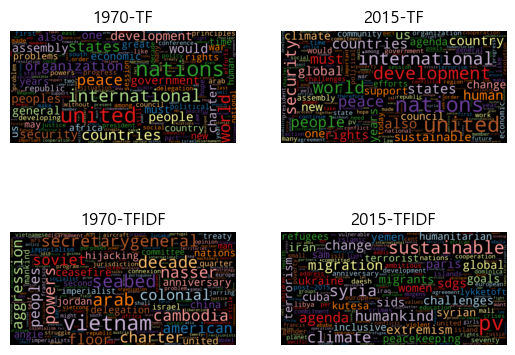

In [114]:
freq_1970=count_words(df[df['year']==1970])
freq_2015=count_words(df[df['year']==2015])

freq_1970['tfidf']=freq_1970['freq']*idf_df['idf']
freq_2015['tfidf']=freq_2015['freq']*idf_df['idf']

plt.subplot(221)
wordcloud(freq_1970['freq'], title='1970-TF', stopwords=['twenty-fifth','twenty-five'])
plt.subplot(222)
wordcloud(freq_2015['freq'], title='2015-TF', stopwords=['seventieth'])
plt.subplot(223)
wordcloud(freq_1970['tfidf'], title='1970-TFIDF', stopwords=['twenty-fifth','twenty-five'])
plt.subplot(224)
wordcloud(freq_2015['tfidf'], title='2015-TFIDF', stopwords=['seventieth'])
plt.show()

In [109]:
freq_1970

,freq,ftidf
token,,
nations,1997,202.894775
united,1996,203.059504
international,1251,131.951149
world,1093,116.164591
peace,970,121.468823
...,...,...
bitterly,2,10.669423
sway,2,9.138488
disquieting,2,7.563688


!pip install textacy

# 1.7 Context Keyword

In [121]:
## 컨텍스트 키워드 탐색
import textacy

if textacy.__version__ < '0.11': # as in printed book
    from textacy.text_utils import KWIC
    
else: # for textacy 0.11.x
    from textacy.extract.kwic import keyword_in_context

    def KWIC(*args, **kwargs):
        # call keyword_in_context with all params except 'print_only'
        return keyword_in_context(*args, 
                           **{kw: arg for kw, arg in kwargs.items() 
                            if kw != 'print_only'})
def kwic(doc_series, keyword, window=35, print_samples=5):

    def add_kwic(text):
        kwic_list.extend(KWIC(text, keyword, ignore_case=True, 
                              window_width=window, print_only=False))

    kwic_list = []
    doc_series.progress_map(add_kwic)

    if print_samples is None or print_samples==0:
        return kwic_list
    else:
        k = min(print_samples, len(kwic_list))
        print(f"{k} random samples out of {len(kwic_list)} " + \
              f"contexts for '{keyword}':")
        for sample in random.sample(list(kwic_list), k):
            print(re.sub(r'[\n\t]', ' ', sample[0])+'  '+ \
                  sample[1]+'  '+\
                  re.sub(r'[\n\t]', ' ', sample[2]))

kwic(df[df['year'] == 2015]['text'], 'sdgs', print_samples=5)

AttributeError: 'Series' object has no attribute 'progress_map'

# 1.8 Ngram Analysis

In [123]:
## Ngram 분석
def ngrams(tokens, n=2, sep=' '):
    return [sep.join(ngram) for ngram in zip(*[tokens[i:] for i in range(n)])]
text="the visible manifestation of the global climate change"
tokens=tokenize(text)
print("|".join(ngrams(tokens)))

the visible|visible manifestation|manifestation of|of the|the global|global climate|climate change


In [126]:
def ngrams(tokens, n=2, sep=' ', stopwords=set()):
    return [sep.join(ngram) for ngram in zip(*[tokens[i:] for i in range(n)]) if len([t for t in ngram if t in stopwords])==0]
print("Bigrams: ", "|".join(ngrams(tokens,2,stopwords=stopwords)))
print("Trigrams: ", "|".join(ngrams(tokens,3,stopwords=stopwords)))

Bigrams:  visible manifestation|global climate|climate change
Trigrams:  global climate change


In [127]:
df['bigrams']= df['text'].apply(prepare, pipeline=[str.lower,tokenize]).apply(ngrams, n=2, stopwords=stopwords)
count_words(df, 'bigrams').head()

,freq
token,
united nations,103236
international community,27786
general assembly,27096
security council,20961
human rights,19856


C:\Users\user\AppData\Local\Temp\ipykernel_2076\194873191.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idf_df['idf']= np.log(len(df)/idf_df['df'])+0.1 ###


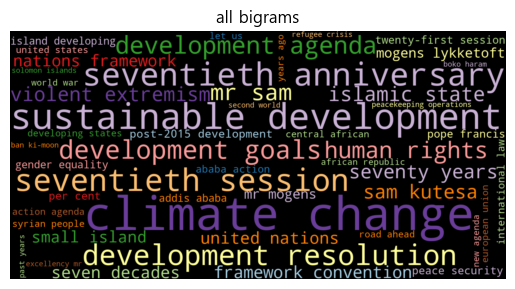

In [132]:
## 기존 IDF 데이터프레임을 bigram IDF와 연결한다.
idf_df=pd.concat([idf_df,compute_idf(df, 'bigrams', min_df=10)])

freq_df=count_words(df[df['year']==2015], 'bigrams')
freq_df['tfidf']= freq_df['freq'] * idf_df['idf']
wordcloud(freq_df['tfidf'], title='all bigrams', max_words=50)

# 1.9 Freq Timeline

In [133]:
## 빈도 타임라인 생성
def count_keywords(tokens, keywords):
    tokens=[t for t in tokens if t in keywords]
    counter=Counter(tokens)
    return [counter.get(k,0) for k in keywords]
    
keywords=['nuclear','terrorism','climate','rights']
tokens=['nuclear','climate','climate','rights','climate','rights']

print(count_keywords(tokens,keywords))

[1, 0, 3, 2]


In [135]:
def count_keywords_by(df, by, keywords, column='tokens'):
    freq_matrix=df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix, columns=keywords)
    freq_df[by]= df[by]

    return freq_df.groupby(by=by).sum().sort_values(by)

,nuclear,terrorism,climate,rights
year,,,,
1970,192,7,18,335
1971,275,9,35,436
1972,393,379,74,428
1973,347,124,79,552
1974,478,24,71,551
1975,578,20,53,636
1976,451,146,57,851
1977,675,75,58,1248
1978,550,82,52,1215


<Axes: xlabel='year'>

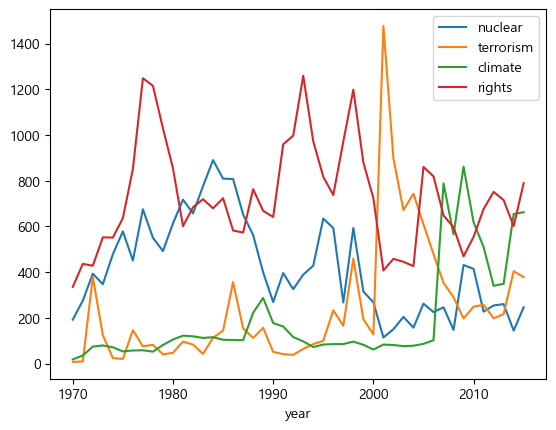

In [137]:
freq_df=count_keywords_by(df, by='year', keywords=keywords)
display(freq_df)
freq_df.plot(kind='line')

<Axes: xlabel='year'>

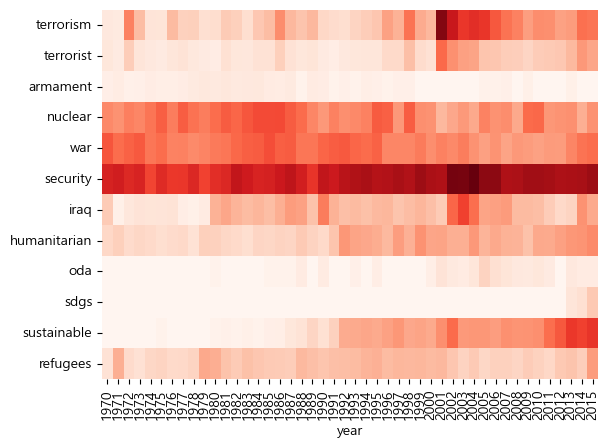

In [140]:
## 빈도히트맵 생성
keywords=['terrorism','terrorist','armament','nuclear','war','security','iraq',
         'humanitarian','oda','sdgs','sustainable','refugees']
freq_df=count_keywords_by(df,by='year', keywords=keywords)

# 연간 총 토큰 수를 기반으로 상대빈도 계산.
freq_df=freq_df.div(df.groupby('year')['num_tokens'].sum(), axis=0)
# 키워드별 뚜렷한 대비를 위하여 제곱근을 하위 선형 필터로 적용.
freq_df=freq_df.apply(np.sqrt)

import seaborn as sns
sns.heatmap(data=freq_df.T, xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")

In [148]:
df_kor=df[df['country']=='KOR']
df_kor.sort_values(by='year')
idf_kor=compute_idf(df_kor, column='tokens', preprocess=None, min_df=2)
freq_kor=count_words(df_kor)

C:\Users\user\AppData\Local\Temp\ipykernel_2076\194873191.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idf_df['idf']= np.log(len(df)/idf_df['df'])+0.1 ###


In [154]:
freq_kor['tfidf']=freq_kor['freq']*idf_kor['idf']

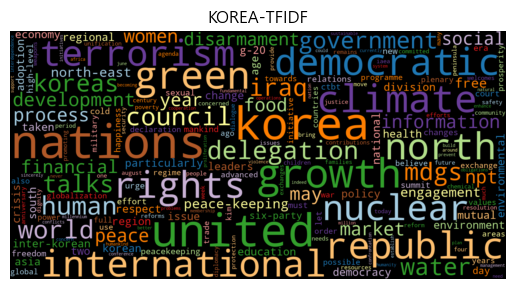

In [157]:
wordcloud(freq_kor['tfidf'], title='KOREA-TFIDF')

In [162]:
count_keywords_by(df_kor, by='year', keywords=['international'], column='tokens')

KeyError: 0

In [159]:
df_kor

,session,year,country,text,country_name,speaker,position,length,tokens,num_tokens,bigrams
224,68,2013,KOR,"May I first \ncongratulate you, Sir, on your e...",Republic of Korea,Yun Byung-se,Minister for Foreign Affairs,13940,"[may, first, congratulate, sir, election, pres...",1193,"[first congratulate, general assembly, sixty-e..."
628,63,2008,KOR,I would like to \nextend my congratulations to...,Republic of Korea,Han Seung-soo,Prime Minister,13458,"[would, like, extend, congratulations, excelle...",1132,"[excellency mr, mr miguel, escoto brockmann, g..."
780,46,1991,KOR,﻿Three years ago I had the pleasure of describ...,"Korea, Republic of",ROH TAE WOO,President,22464,"[three, years, ago, pleasure, describing, asse...",1943,"[three years, years ago, heart-warming scenes,..."
1177,57,2002,KOR,﻿The\ntragic events of 11 September 2001 awake...,South Korea,Choi Sung-hong,Minister for Foreign Affairs,9515,"[tragic, events, september, awakened, internat...",829,"[tragic events, september awakened, internatio..."
1405,51,1996,KOR,﻿On behalf of the\nGovernment and the people o...,South Korea,Ro-Myung Gong,Minister for Foreign Affairs,20335,"[behalf, government, people, republic, korea, ...",1764,"[korea sir, sincere congratulations, fifty-fir..."
1580,67,2012,KOR,﻿Allow\nme at the outset to express my sincere...,South Korea,Kim Sung-hwan,Minister for Foreign Affairs,10812,"[allow, outset, express, sincere, congratulati...",926,"[sincere congratulations, mr vuk, vuk jeremić,..."
1799,52,1997,KOR,"﻿I congratulate you,\nSir, on assuming the pre...","Korea, Republic of",Chong Ha Yoo,Minister for Foreign Affairs,17375,"[congratulate, sir, assuming, presidency, fift...",1471,"[fifty-second session, general assembly, full ..."
2228,65,2010,KOR,I would \nlike to begin by extending my warmes...,Republic of Korea,Shin Kak-soo,Minister for Foreign Affairs,12574,"[would, like, begin, extending, warmest, congr...",1106,"[warmest congratulations, sixty-fifth session,..."
2664,50,1995,KOR,"Mr.\nPresident, congratulations on your assump...","Korea, Republic of",Mr. Gong Ro-Myung,Minister for Foreign Affairs,17201,"[mr, president, congratulations, assumption, p...",1471,"[mr president, president congratulations, hist..."
2831,64,2009,KOR,"First of all, let me extend \nmy sincere congr...",Republic of Korea,Lee Myung-bak,President,13272,"[first, let, extend, sincere, congratulations,...",1121,"[sincere congratulations, president mr, mr ali..."
